In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd


Using TensorFlow backend.


In [2]:
#data 
#test_df=pd.read_csv("../input/test.csv")
test_df=pd.read_csv("test.csv")
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#train_df=pd.read_csv("../input/train.csv")
train_df=pd.read_csv("train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# using training data and dividing it in features and labels
#features
#reshaping the same into pixel size
X=train_df.iloc[:,1:].values
X=X.reshape(len(X),28,28,1) # 28*28 pixels and 1 is for no color,else 3 for RGB primary colors
X.shape


(42000, 28, 28, 1)

In [5]:
#labels
y=train_df.iloc[:,:1].values #labels have values ranging 0-9
y.shape

(42000, 1)

In [6]:
#using to_categorical for labels to remove raltion ships amongst them
y=keras.utils.to_categorical(y,num_classes=10)
y.shape

(42000, 10)

In [7]:
#converting the data into np arrays
X=np.array(X)
y=np.array(y)

In [8]:
X.shape,y.shape

((42000, 28, 28, 1), (42000, 10))

In [9]:
#normalize the feature to range between 0-255
X=X/255

In [92]:
#Convinusional neural networkusing sequenctial model
from keras.models import Sequential
model=Sequential()
#adding conenutional layers
from keras.layers import Convolution2D,MaxPooling2D, Dense,Flatten,Dropout #CN and max pooling
#CN layer has random size,dimension of conv
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
#max pooling to get max value  from each convenution.
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.35))

model.add(Convolution2D(32,(3,3),activation="relu"))
#max pooling to get max value  from each convenution.
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.30))
#fully connected network
model.add(Flatten()) #converts data to vector
model.add(Dense(100))# adding 100 dense nodes
#model.add(Dropout(0.50)) # remove or drop  bad weight 20%
model.add(Dense(10,activation="softmax")) #output layer for probability of each output to be 0-9
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total para

In [93]:
#compiling the model. loss used ascategorical_crossentropy as we are doing a classification problem.
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [97]:
#training
history=model.fit(X,y,epochs=20,batch_size=100)

Epoch 1/20
42000/42000 [==============================] - 29s 695us/step - loss: 0.0069 - acc: 0.9979
Epoch 2/20
42000/42000 [==============================] - 29s 688us/step - loss: 0.0032 - acc: 0.9989
Epoch 3/20
42000/42000 [==============================] - 29s 698us/step - loss: 0.0015 - acc: 0.9996
Epoch 4/20
42000/42000 [==============================] - 30s 709us/step - loss: 0.0022 - acc: 0.9993
Epoch 5/20
42000/42000 [==============================] - 30s 705us/step - loss: 0.0058 - acc: 0.9982
Epoch 6/20
42000/42000 [==============================] - 29s 701us/step - loss: 0.0044 - acc: 0.9988
Epoch 7/20
42000/42000 [==============================] - 30s 703us/step - loss: 0.0039 - acc: 0.9987
Epoch 8/20
42000/42000 [==============================] - 29s 700us/step - loss: 0.0056 - acc: 0.9981
Epoch 9/20
42000/42000 [==============================] - 31s 727us/step - loss: 0.0046 - acc: 0.9986
Epoch 10/20
42000/42000 [==============================] - 30s 715us/step - loss: 

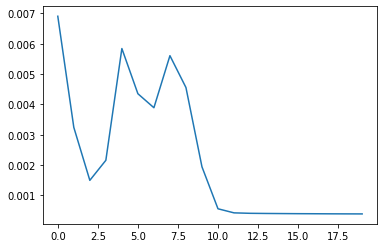

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["loss"])
#plt.plot(history.history["val_loss"])


In [99]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X_test=test_df.values
X_test=X_test.reshape(len(X_test),28,28,1) # 28*28 pixels and 1 is for no color,else 3 for RGB primary colors
X_test.shape

(28000, 28, 28, 1)

In [101]:
#Normalize
#since the data is in range between 0 -255 lets normalize it as a better model practice
X_test=tf.keras.utils.normalize(X_test,axis=1)
X_test.shape  # itxs now range between 0-1

(28000, 28, 28, 1)

In [103]:
model.predict(X_test)

array([[1.66475652e-13, 7.70204907e-12, 1.00000000e+00, ...,
        5.68084919e-11, 1.42020944e-13, 9.72448847e-14],
       [9.99814570e-01, 4.28775024e-08, 8.70423435e-07, ...,
        2.78971993e-06, 4.17480010e-07, 8.59225838e-05],
       [2.79517163e-14, 2.33364705e-09, 7.25132239e-04, ...,
        1.43631496e-09, 7.49122719e-08, 9.99191582e-01],
       ...,
       [1.09455628e-19, 5.97239475e-14, 1.39227195e-14, ...,
        2.60183368e-12, 1.52580856e-13, 2.13459919e-13],
       [8.55632720e-07, 3.55739621e-06, 1.15888270e-06, ...,
        6.44172949e-04, 4.19292473e-06, 9.77194190e-01],
       [6.40778349e-15, 3.78699086e-11, 1.00000000e+00, ...,
        1.25834887e-09, 3.68719270e-14, 4.01005531e-12]], dtype=float32)

In [104]:
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [105]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_data_compertition2.csv",index=False)


In [106]:
#save the mdel
model.save("mnist_CNN_model")

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
model1=Sequential()
vgg=VGG16()

In [170]:
vgg(weights="imagenet",include_top=False,input_shape=(28,28,3))

TypeError: __call__() missing 1 required positional argument: 'inputs'

In [ ]:
vgg.input_shape

In [ ]:
for layers in vgg.layers[:-1]:
    model1.add(layers)
    